<a href="https://colab.research.google.com/github/xrizer/Portfolio-Data-Analysis/blob/main/Datamining_kelompok1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA by Kelompok 1 - Jakarta** 
1.   Aqshol Afifi (11190930000057)
2.   Hana Rahmaniah  Sabila (11190930000058)
3.   Muhammad Farid (11190930000070)
4.   Yayi Puspita Sari (11190930000052)
5.   Muthia Farah Hanifa (11190930000073)

**Data berdasarkan rumah123.com yang di ambil melalui proses scraping manual web**




# **Tahap Preprocessing**

In [ ]:
# Mengimport modul Python.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
# Mengimport data csv dan menampilkan beberapa data teratas.
df = pd.read_excel('https://github.com/xrizer/tugas-programming-class/blob/master/kelompok%201%20fix.xlsx?raw=true')
df.head()

,no,tgl_iklan,url,harga,kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,2021-03-31,https://www.rumah.com/listing-properti/dijual-...,682200000,Jakarta,44,52,3,2,0,0,1,0,2200.0,SHM,"Rumah murah strategis KPR All in, 2 lantai pre...",\nRumah Murah Dan Asri Dekat Pintu Tol Anti Ba...
1,2,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,2100000000,Jakarta,162,200,4,2,1,1,0,1,3500.0,SHM,Dijual rumah bagus di Taman Modern cakung,Dijual Rumah Bagus Di Taman Modern Cakung Jaka...
2,3,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,2900000000,Jakarta,102,200,4,2,1,1,1,1,3500.0,SHM,"Rumah di Janur Asri, Kelapa Gading","Rumah Di Janur Asri, Kelapa Gading\nDijual rum..."
3,4,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,4900000000,Jakarta,149,225,4,3,1,0,2,1,2200.0,SHM,Harga Perdana Rumah 3 Lantai di The Heritage R...,Rumah Mewah 3 Lantai Harga Perdana\nLaunch NOW...
4,5,2021-04-01,https://www.rumah.com/listing-properti/dijual-...,2800000000,Jakarta,120,180,4,3,1,1,2,0,2200.0,SHM,Rumah Mewah Siap Huni Strategis Dekat Toll Jag...,10 Menit Menuju Toll Andara\nFDL 2187RJ\nDijua...


In [ ]:
# Memeriksa data yang terduplikasi.
df.duplicated().any()

False

In [ ]:
# Menghapus variabel no, tgl_iklan, url, judul, deskripsi, dan kota.
hapus = ['no','tgl_iklan','url','judul','deskripsi','kota']
df.drop(hapus,axis=1,inplace=True)

# **Handle Missing Values**

In [ ]:
# Memeriksa missing values.
df.isna().any()

harga      False
LT         False
LB         False
KT         False
KM         False
KTP        False
KMP        False
carport    False
garasi     False
listrik     True
surat      False
dtype: bool

Terdapat missing values pada kolom listrik.

In [ ]:
# Mengimputasi missing values pada kolom listrik menggunakan sklearn simple imputer dengan metode median.
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df[['listrik']])
df['listrik'] = imr.transform(df[['listrik']]).ravel()

In [ ]:
# Memeriksa kolom listrik setelah diimputasi.
df.isnull().any()

harga      False
LT         False
LB         False
KT         False
KM         False
KTP        False
KMP        False
carport    False
garasi     False
listrik    False
surat      False
dtype: bool

In [ ]:
# Statistik deskriptif data.
df.describe()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.417133e+09,212.210000,247.980000,3.840000,3.080000,0.350000,0.230000,1.700000,0.390000,4278.000000
std,1.169911e+10,235.522299,275.820392,1.405041,1.685829,0.592461,0.422953,1.666667,0.601261,6774.932703
min,1.400000e+08,20.000000,35.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1300.000000
25%,1.200000e+09,90.000000,90.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
50%,2.275000e+09,135.000000,170.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,4.575000e+09,238.500000,283.500000,4.250000,4.000000,1.000000,0.000000,2.000000,1.000000,3725.000000
max,9.600000e+10,1500.000000,2000.000000,10.000000,10.000000,3.000000,1.000000,9.000000,3.000000,66000.000000


In [ ]:
# Memisahkan data yang hanya bertipe numerik.
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,682200000,44,52,3,2,0,0,1,0,2200.0
1,2100000000,162,200,4,2,1,1,0,1,3500.0
2,2900000000,102,200,4,2,1,1,1,1,3500.0
3,4900000000,149,225,4,3,1,0,2,1,2200.0
4,2800000000,120,180,4,3,1,1,2,0,2200.0


In [ ]:
# Memastikan tipe data surat adalah kategorik.
df['surat'] = df['surat'].astype('category')
df.dtypes

harga         int64
LT            int64
LB            int64
KT            int64
KM            int64
KTP           int64
KMP           int64
carport       int64
garasi        int64
listrik     float64
surat      category
dtype: object

In [ ]:
# Memisahkan variabel surat
df_cat = df['surat']
df_cat.head()

0    SHM
1    SHM
2    SHM
3    SHM
4    SHM
Name: surat, dtype: category
Categories (5, object): ['HGB', 'PPJB', 'SHGB', 'SHM', 'Strata']

# **Mengecek korelasi antar variabel**

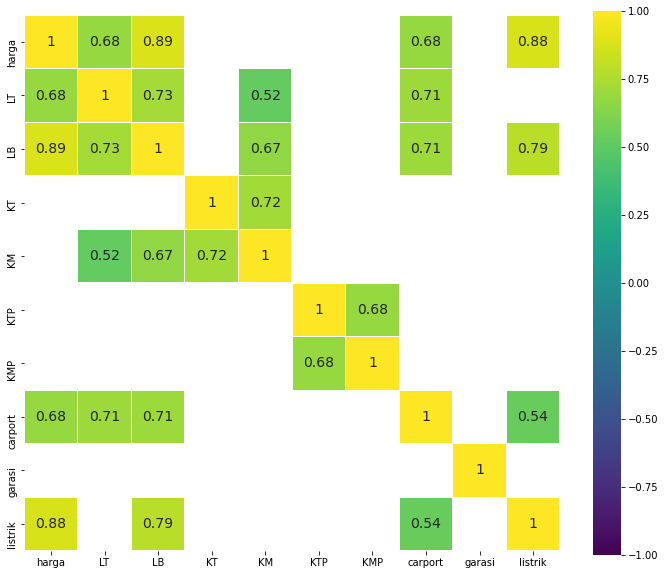

In [ ]:
# Mengimport library seaborn.
# Data divisualisasikan menggunakan heatmap untuk menganalisa korelasi antar variabel.
corr = df_num.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);


Berdasarkan korelasi antar variabel yang divisualisasikan oleh heatmap, terlihat bahwa variabel harga memiliki korelasi yang cukup kuat dengan daya listrik (0.88), luas bangunan (0.89), luas tanah (0.68), dan carport (0.68). Selain itu, luas bangunan dan daya listik pun memiliki korelasi yang cukup kuat (0.79).




In [ ]:
# Memisahkan data yang berkorelasi dengan baik. 
korelasi = df_num[['harga','LB','LT','listrik','carport']] 
korelasi

,harga,LB,LT,listrik,carport
0,682200000,52,44,2200.0,1
1,2100000000,200,162,3500.0,0
2,2900000000,200,102,3500.0,1
3,4900000000,225,149,2200.0,2
4,2800000000,180,120,2200.0,2
...,...,...,...,...,...
95,6500000000,468,417,5500.0,4
96,6600000000,600,1080,2200.0,4
97,28000000000,1000,500,16500.0,3
98,1700000000,165,100,2200.0,2


# **Memeriksa Outlier pada kolom harga**

In [ ]:
# Memeriksa outlier harga based on/berdasarkan jenis surat (boxplot).
fig = px.box(df, x="surat", y="harga",title='Tabel Outlier Harga Rumah (milyar) berdasarkan jenis Surat',labels={
                     "harga": "Harga Rumah(milyar)",
                     "surat": "Jenis Sertifikat Rumah",
                 })
fig.show()


Boxplot digunakan untuk mengecek persebaran data, dapat dilihat bahwa pada rumah yang bersertifikat SHM memiliki outlier dengan harga rumah yang lebih dari 15 milyar hingga  mencapai 96 milyar rupiah.

In [ ]:
# Memeriksa outliers pada data menggunakan IQR (Inter Quartile range) dan memisahkanya.
from numpy import quantile
Q1 = korelasi.quantile(0.25)
Q3 = korelasi.quantile(0.75)
IQR = Q3 - Q1

no_outliers = korelasi[(Q1 - 1.5*IQR < korelasi) &  (korelasi < Q3 + 1.5*IQR)]
outliers = korelasi[(Q1 - 1.5*IQR >= korelasi) |  (korelasi >= Q3 + 1.5*IQR)]

In [ ]:
outliers

,harga,LB,LT,listrik,carport
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,4.0
96,NaN,600.0,1080.0,NaN,4.0
97,2.800000e+10,1000.0,500.0,16500.0,NaN
98,NaN,NaN,NaN,NaN,NaN


In [ ]:
#index data outlier
x = outliers['harga'].dropna().index.ravel()
x

array([23, 24, 25, 35, 42, 46, 87, 89, 97])

In [ ]:
data = korelasi

In [ ]:
data = pd.concat([data, df_cat], axis = 1)
data.tail()

,harga,LB,LT,listrik,carport,surat
95,6500000000,468,417,5500.0,4,SHM
96,6600000000,600,1080,2200.0,4,SHM
97,28000000000,1000,500,16500.0,3,SHM
98,1700000000,165,100,2200.0,2,SHM
99,875000000,70,72,2200.0,1,SHM


In [ ]:
# Data Normal
data1 = data.drop(index=x)
data1

,harga,LB,LT,listrik,carport,surat
0,682200000,52,44,2200.0,1,SHM
1,2100000000,200,162,3500.0,0,SHM
2,2900000000,200,102,3500.0,1,SHM
3,4900000000,225,149,2200.0,2,SHM
4,2800000000,180,120,2200.0,2,SHM
...,...,...,...,...,...,...
94,2250000000,140,107,2200.0,2,SHM
95,6500000000,468,417,5500.0,4,SHM
96,6600000000,600,1080,2200.0,4,SHM
98,1700000000,165,100,2200.0,2,SHM


terdapat 9 outliers berdasarkan harga

In [ ]:
# Data Outliers
data2 = pd.concat([korelasi, df_cat], axis = 1)
data2 = data2.iloc[x,:]

data2

,harga,LB,LT,listrik,carport,surat
23,20000000000,800,576,10600.0,0,HGB
24,96000000000,2000,700,66000.0,9,SHM
25,15000000000,260,276,8000.0,2,SHM
35,19000000000,428,883,3500.0,3,SHM
42,55000000000,1200,1500,7700.0,8,SHM
46,10000000000,157,238,13200.0,3,SHM
87,20000000000,1000,550,11000.0,7,SHM
89,30000000000,550,1198,10600.0,7,SHM
97,28000000000,1000,500,16500.0,3,SHM


# **Visualisasi Data normal**

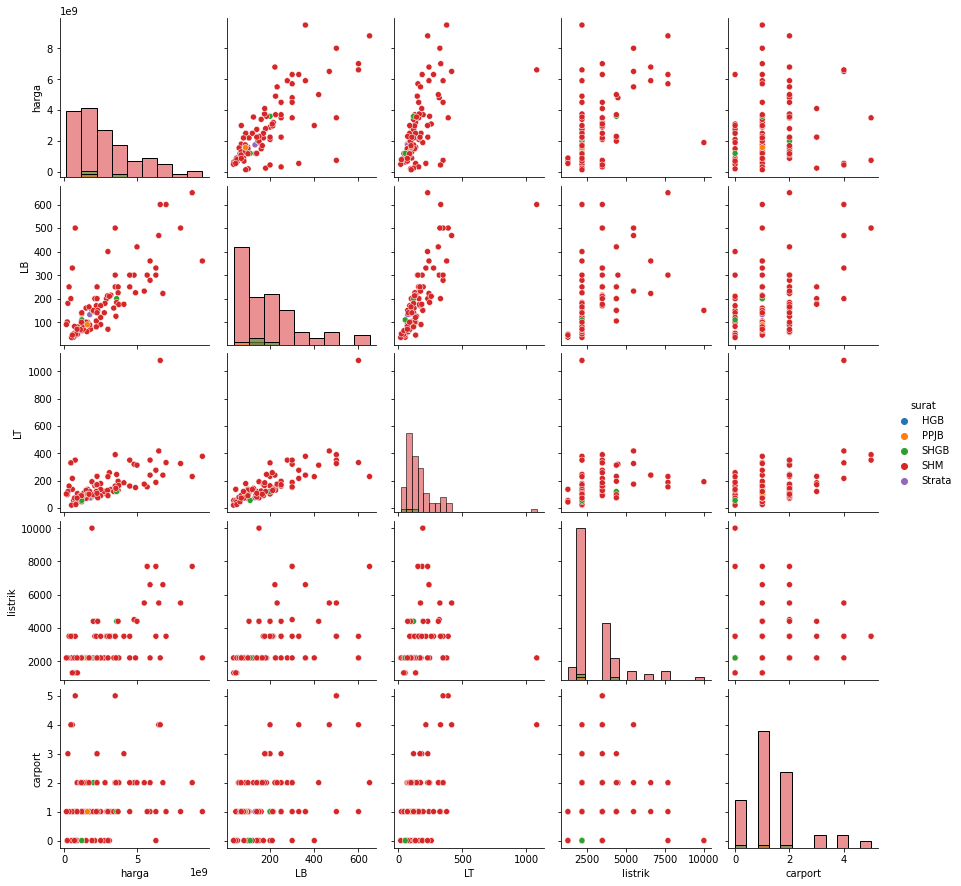

In [ ]:
sns.pairplot(data1, hue="surat", diag_kind="hist")

Pada grafik di atas dapat dilihat harga suatu rumah sangat dipengaruhi oleh luas bangunan, seberapa tinggi daya listrik yang digunakan, dan jumlah carport.


# **Visualisasi  Data Outliers**

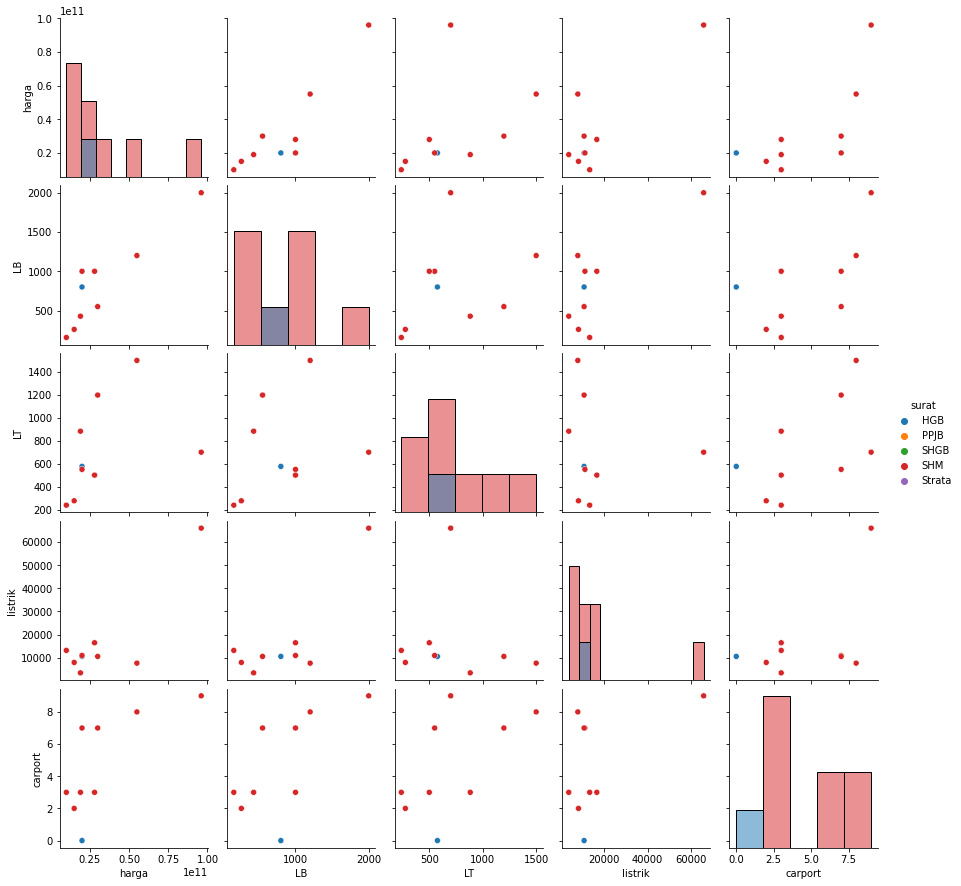

In [ ]:
sns.pairplot(data2, hue="surat", diag_kind="hist")

# **Clustering**

In [ ]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 1.2MB 31.2MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=d5deeec5e5c07130b0895965138dda23b028710503cfeb6c54afe743dfaf3641
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51362 sha256=51cd6fba21b30c74f1c7e720e117a2daf69692565e6f5a6a81eaaa7d2d4df955
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent
--2021-06-28 11:53:04--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:

In [ ]:
import umap, tau_unsup as tau
import warnings; warnings.simplefilter('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

In [ ]:
# Mengubah dataframe menjadi array
num_data = data1.drop('surat',axis=1)
num_data.values

array([[6.822000e+08, 5.200000e+01, 4.400000e+01, 2.200000e+03,
        1.000000e+00],
       [2.100000e+09, 2.000000e+02, 1.620000e+02, 3.500000e+03,
        0.000000e+00],
       [2.900000e+09, 2.000000e+02, 1.020000e+02, 3.500000e+03,
        1.000000e+00],
       [4.900000e+09, 2.250000e+02, 1.490000e+02, 2.200000e+03,
        2.000000e+00],
       [2.800000e+09, 1.800000e+02, 1.200000e+02, 2.200000e+03,
        2.000000e+00],
       [5.900000e+09, 3.600000e+02, 2.400000e+02, 6.600000e+03,
        1.000000e+00],
       [3.700000e+09, 2.250000e+02, 1.300000e+02, 2.200000e+03,
        2.000000e+00],
       [1.200000e+09, 1.350000e+02, 9.100000e+01, 2.200000e+03,
        1.000000e+00],
       [3.200000e+09, 2.150000e+02, 1.350000e+02, 3.500000e+03,
        1.000000e+00],
       [2.500000e+09, 9.000000e+01, 1.780000e+02, 2.200000e+03,
        1.000000e+00],
       [3.400000e+09, 1.600000e+02, 1.200000e+02, 2.200000e+03,
        1.000000e+00],
       [1.900000e+09, 1.500000e+02, 1.92000

In [ ]:
# Scaling data menggunakan MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_scaled = mm.fit_transform(num_data)
data_scaled[:5]

array([[0.05792735, 0.02764228, 0.02264151, 0.10344828, 0.2       ],
       [0.20940171, 0.26829268, 0.13396226, 0.25287356, 0.        ],
       [0.29487179, 0.26829268, 0.07735849, 0.25287356, 0.2       ],
       [0.50854701, 0.30894309, 0.12169811, 0.10344828, 0.4       ],
       [0.28418803, 0.23577236, 0.09433962, 0.10344828, 0.4       ]])

In [ ]:
# Mengubah array menjadi dataframe
data_scaled = pd.DataFrame(data_scaled)
data_scaled.head()

,0,1,2,3,4
0,0.057927,0.027642,0.022642,0.103448,0.2
1,0.209402,0.268293,0.133962,0.252874,0.0
2,0.294872,0.268293,0.077358,0.252874,0.2
3,0.508547,0.308943,0.121698,0.103448,0.4
4,0.284188,0.235772,0.094340,0.103448,0.4


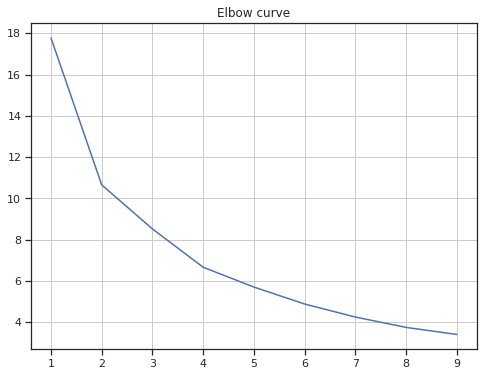

In [ ]:
# Menggunakan Elbow Method untuk menentukan banyaknya cluster
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(data_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

In [ ]:
# Apabila jumlah cluster = 2
k=2
kmPP2 = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 99)
kmPP2.fit(c_scaled)
C_kmpp2 = kmPP2.predict(data_scaled)
 
sns.countplot(C_kmpp2)
C_kmpp2[:10]

NameError: ignored

In [ ]:
# Apabila jumlah cluster = 3
k=3
kmPP3 = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 99)
kmPP3.fit(c_scaled)
C_kmpp3 = kmPP3.predict(data_scaled)
 
sns.countplot(C_kmpp3)
C_kmpp3[:10]

In [ ]:
# Apabila jumlah cluster = 4
k=4
kmPP4 = KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 99)
kmPP4.fit(c_scaled)
C_kmpp4 = kmPP4.predict(data_scaled)
 
sns.countplot(C_kmpp4)
C_kmpp4[:10]

In [ ]:
# Spherical menggunakan k=2
X2D = umap.UMAP(random_state=99).fit_transform(data_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp2, cmap='Spectral');

In [ ]:
# Spherical menggunakan k=3
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp3, cmap='Spectral');

In [ ]:
# Spherical menggunakan k=4
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp4, cmap='Spectral');

In [ ]:
tau.sil_based_optimal_km()

In [ ]:
Hasil_Clustering = [C_kmpp2, C_kmpp3, C_kmpp4]
for res in Hasil_Clustering:
    print(siluet(c_scaled,res), end=', ')

In [ ]:
kmPP4.cluster_centers_

In [ ]:
# kami memilih cluster = 3 karena memiliki interpretability yang lebih baik dalam segi grafik 
cols = ['harga','LT','LB','carport','listrik']
dfC = pd.DataFrame(kmPP3.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index
 
pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

karakteristik cluster :

1.   Cluster 0

2.   Cluster 1

3.   Cluster 2




# **Kesimpulan**
1.  Pada 100 data rumah kota jakarta di rumah.com didapat rata2 harga rumah yang telah kami analisis berkisar di 5,4 milyar,nah dari sekian rumah tersebut terdapat rumah yang paling mahal yaitu senilai 96 milyar dan yang paling murah 140 juta
2.  Harga rumah tersebut sangat dipengaruhi oleh berapa luas bangunanya dan jumlah voltase listrik yang digunakan oleh karena itu penting untuk mempertimbangkan luas bangunan dan voltase listrik saat akan membeli rumah di daerah jakarta 
3.  Dari hasil clustering yang kami lakukan dapat dilihat bahwa terdapat 3 kluster yang dapat dibagi berdasarkan variabel harga 
cluster : 
Cluster 1(merah)  
dari segi harga dan fasilitas yang didapatkan sudah mengikuti standar harga rumah,cocok bagi para pasangan yang baru menikah atau yang ingin memiliki rumah sederhana

cluster 2(hijau)
dari segi harga cukup mahal sedangkan luas tanah dan bangunanya serta fasilitasny masih dibilang kurang dibanding cluster 3(hipotesis : lokasi strategis)

cluster 3(biru)
harga cukup competitiv didukung dengan luas tanah dan bangunanya serta fasilitasnya yg lebih memadai

**Saran pengambilan keputusan :**

untuk para calon pembeli rumah sebaiknya mempertimbangkan untuk membeli rumah pada cluster 3 dikarenakan memiliki harga yang cukup kompetitif dan fasilitas yang cukup memadai 

